# Classification models 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Data 

In [2]:
dataFrame = pd.read_csv('..\..\..\datasets\Human_Activity\combine_Phone_and_Watch_interpolated.csv')

In [3]:
dataFrame.head()

,Unnamed: 0,index,timestamp,activity,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,audio_mic_4,gravity,...,gyroscope_X_watch,gyroscope_Y_watch,gyroscope_Z_watch,magnetometer_X_watch,magnetometer_Y_watch,magnetometer_Z_y,battery_y,heart_rate,pressure_combine,diffTimeSec
0,1,0,2017-06-29 09:57:30,Eat,1.0,11927.200000,7563.650340,32767.0,45.0,9.428560,...,-1.027466,0.728256,0.866241,42.903137,-9.513855,-25.811768,82.00,76.875000,963.811290,30.0
1,2,1,2017-06-29 09:58:00,Eat,1.0,9694.366667,7582.004297,32767.0,45.0,9.495720,...,-1.385284,1.318619,1.436371,28.717041,-23.501587,-18.550110,81.50,83.500000,964.262190,30.0
2,3,2,2017-06-29 09:58:30,Eat,1.0,7590.000000,7579.942257,32767.0,45.0,9.548030,...,-0.694199,0.503960,0.044128,34.047699,-12.238312,-14.639283,81.25,80.955714,963.352867,30.0
3,4,3,2017-06-29 09:59:00,Eat,1.0,11810.733333,7589.977663,32767.0,45.0,9.502039,...,-0.003113,-0.310699,-1.348114,39.378357,-0.975037,-10.728455,81.00,78.411429,963.610606,30.0
4,5,4,2017-06-29 09:59:30,Eat,1.0,7881.866667,7600.249840,32767.0,45.0,9.609119,...,0.115019,-0.297179,-0.684662,-11.760711,16.645813,-20.403798,81.00,73.322857,963.513331,30.0


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6160 entries, 0 to 6159
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              6160 non-null   int64  
 1   index                   6160 non-null   int64  
 2   timestamp               6160 non-null   object 
 3   activity                6160 non-null   object 
 4   step_detector           6160 non-null   float64
 5   audio_mic_1             6160 non-null   float64
 6   audio_mic_2             6160 non-null   float64
 7   audio_mic_3             6160 non-null   float64
 8   audio_mic_4             6160 non-null   float64
 9   gravity                 6160 non-null   float64
 10  linear_acceleration     6160 non-null   float64
 11  orientation_X_phone     6160 non-null   float64
 12  orientation_Y_phone     6160 non-null   float64
 13  orientation_Z_phone     6160 non-null   float64
 14  accelerometer_X_phone   6160 non-null   

In [5]:
FeaturesTable = dataFrame.drop(columns=['Unnamed: 0','index','timestamp','activity','diffTimeSec'])
FeaturesTable.head()

,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,audio_mic_4,gravity,linear_acceleration,orientation_X_phone,orientation_Y_phone,orientation_Z_phone,...,accelerometer_Z_watch,gyroscope_X_watch,gyroscope_Y_watch,gyroscope_Z_watch,magnetometer_X_watch,magnetometer_Y_watch,magnetometer_Z_y,battery_y,heart_rate,pressure_combine
0,1.0,11927.200000,7563.650340,32767.0,45.0,9.428560,2.384370,22.952714,60.453024,-5.277635,...,1.480637,-1.027466,0.728256,0.866241,42.903137,-9.513855,-25.811768,82.00,76.875000,963.811290
1,1.0,9694.366667,7582.004297,32767.0,45.0,9.495720,1.978390,43.617109,81.183346,8.174922,...,2.818146,-1.385284,1.318619,1.436371,28.717041,-23.501587,-18.550110,81.50,83.500000,964.262190
2,1.0,7590.000000,7579.942257,32767.0,45.0,9.548030,1.396605,4.632983,75.299680,48.593347,...,2.174874,-0.694199,0.503960,0.044128,34.047699,-12.238312,-14.639283,81.25,80.955714,963.352867
3,1.0,11810.733333,7589.977663,32767.0,45.0,9.502039,5.458737,-32.125872,65.046507,-46.384025,...,1.531603,-0.003113,-0.310699,-1.348114,39.378357,-0.975037,-10.728455,81.00,78.411429,963.610606
4,1.0,7881.866667,7600.249840,32767.0,45.0,9.609119,2.982487,135.779456,77.457162,-25.646591,...,0.245060,0.115019,-0.297179,-0.684662,-11.760711,16.645813,-20.403798,81.00,73.322857,963.513331


In [6]:
label = dataFrame['activity']
label.unique()

array(['Eat', 'Walk', 'Running', 'In computer', 'Meeting', 'Sleep',
       'Video games', 'Picnic ', 'Watching TV', 'Cooking', 'Movie',
       'Pause', 'Football'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='activity'>

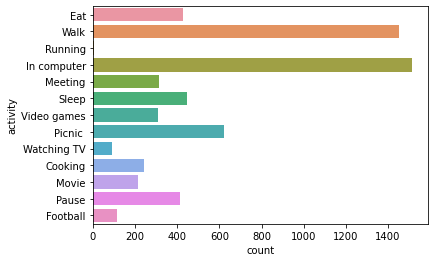

In [7]:
sns.countplot(y = label, data = label)

## Split Train and Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesTable, label, test_size=0.20, random_state=42)

Text(0.5, 1.0, 'Train Datset')

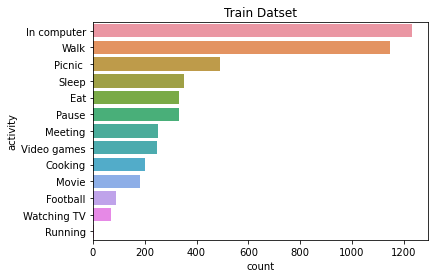

In [9]:
sns.countplot(y = y_train, order = y_train.value_counts().index).set_title('Train Datset')

Text(0.5, 1.0, 'Test Datset')

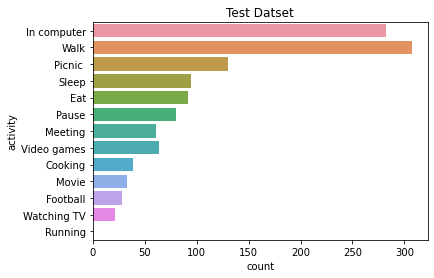

In [10]:
sns.countplot(y = y_test,order = y_train.value_counts().index).set_title('Test Datset')

## Standardize the Variables

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features_train = scaler.transform(X_train)
scaled_features_test = scaler.transform(X_test)

## Models

### Examining different models with different parameters

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

class PipelinesListMixin(object):
    @property
    def meta_estimators(self):
        scoring = 'f1_weighted'

        # Logistic Regression
        pipe_lr = Pipeline([('scl', StandardScaler()),
                            ('lr',  LogisticRegression(random_state=0))])
        param_grid = [{'lr__C': [10 ** int(C) for C in np.arange(-5, 5)],
                       'lr__penalty': ['l2', 'l1'],
                       'lr__class_weight': ['balanced',None]}]
        gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # SVM
        pipe_svm = Pipeline([('scl', StandardScaler()),
                            ('svm', SVC(random_state=0))])
        param_grid = [{'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__kernel': ['linear']},
                      {'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__gamma': ['auto'],
                        'svm__kernel': ['rbf'],
                        'svm__class_weight': ['balanced',None]}]
        gs_svm = GridSearchCV(estimator=pipe_svm, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # Tree
        pipe_tree = Pipeline([('tree', DecisionTreeClassifier(random_state=0))])
        param_grid = [{'tree__criterion': ['entropy'],
                       'tree__max_depth': [3],
                       'tree__class_weight': ['balanced',None]}]
        gs_tree = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=scoring, cv=2,
                                n_jobs=5)

        # Adaboost
        tree = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1)
        pipe_ada = Pipeline([('adaboost', AdaBoostClassifier(base_estimator=tree, random_state=0))])
        param_grid = [{'adaboost__n_estimators': [500],
                       'adaboost__learning_rate': [0.1]}]
        gs_ada = GridSearchCV(estimator=pipe_ada, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
 
        # Forest
        pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
        param_grid = [{'forest__criterion': ['entropy'],
                       'forest__n_estimators': [10],
                       'forest__max_depth': [None, 10, 20, 30],
                       'forest__class_weight':['balanced',None]}]
        gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring=scoring, cv=2,
                                  n_jobs=5)

        # KNN
        pipe_knn = Pipeline( [('knn', KNeighborsClassifier())])
        param_grid = [{'knn__n_neighbors': [5],
                       'knn__p': [2]}]
        gs_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
        
        return [gs_lr, gs_svm, gs_ada, gs_tree, gs_forest, gs_knn] 

class ComparingClassifiers(PipelinesListMixin):
    def fit(self, X, y, scoring):
        algorithm_scores = []
        for gs in self.meta_estimators:
            #In each cross validation of cross_val_score function the GridSearchCV (gs) is working and run internal cross validation.
            #The aim is to do another level of validation set - for selecting the best algorithm.
            scores = cross_val_score(gs, X, y, scoring=scoring, cv=5, n_jobs=10)
            mean_scores = np.mean(scores) # Scores of all best models of the same algorithm (on each of the iterations of the outer cross validation).
            algorithm_scores.append(mean_scores)
            print('Mean score: ${:.3f}$ for algorithm: ${}$'.format(mean_scores, gs.estimator.steps[-1][0]))
        best_grid_search = self.meta_estimators[np.argmax(algorithm_scores)]
        return best_grid_search.fit(X, y)

best_algorithm = ComparingClassifiers().fit(X_train, y_train, 'f1_weighted')
print('The best algorithm is: ${}$. The accurate on all training data is: ${}$'.format(best_algorithm.estimator.steps[-1][0], best_algorithm.score(X_train, y_train)))

Mean score: $0.786$ for algorithm: $lr$


: 

In [ ]:
# Check model preformance on the best model 
from sklearn.metrics import classification_report,confusion_matrix
pred = best_algorithm.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
param_grid = [{'forest__criterion': ['entropy'],
                'forest__n_estimators': [10],
                'forest__max_depth': [None, 10, 20, 30],
                'forest__class_weight':['balanced',None]}]
gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring='f1_weighted', cv=2,
                            n_jobs=5)

gs_forest.fit(X_train, y_train)
best_params = gs_forest.best_params_
best_max_depth = best_params['forest__max_depth']
print("Best Max Depth:", best_max_depth)

best_class_weight = best_params['forest__class_weight']
print("Class Weight:", best_class_weight)

Best Max Depth: None
Class Weight: None


### Performance analysis of the best model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, random_state=0, class_weight=None)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 38   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1  89   0   0   0   1   0   0   0   0   0   1   0]
 [  0   0  28   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 282   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  61   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  33   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  80   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 130   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  95   0   0   0]
 [  0   1   0   1   0   1   0   0   0   0  60   1   0]
 [  0   0   0   7   0   0   0   0   1   0   0 299   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  21]]
              precision    recall  f1-score   support

     Cooking       0.97      0.97      0.97        39
         Eat       0.98      0.97      0.97        92
    Football       1.00      1.00      1.00        28
 In computer       0.97      1.00      0.99       282
     Meeting 

c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Check the importance of each feature

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

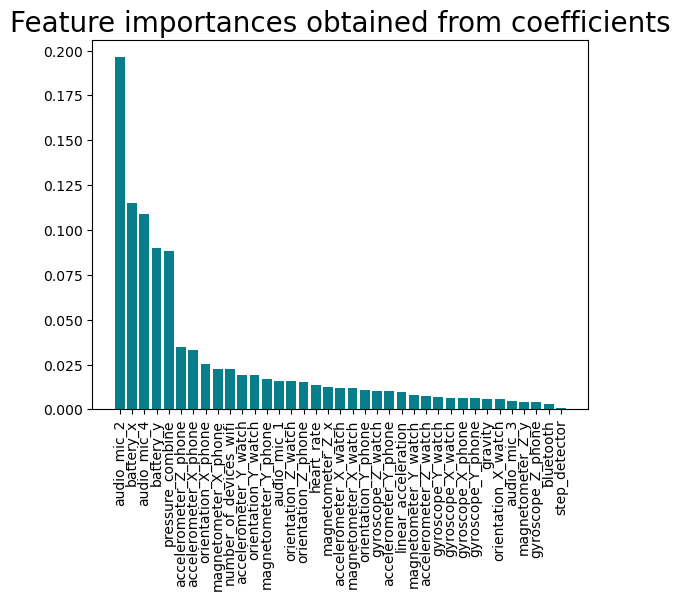

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Re-run the model using only the 5 most important features

In [ ]:
print(importances['Attribute'][:5])

2          audio_mic_2
20           battery_x
4          audio_mic_4
34           battery_y
36    pressure_combine
Name: Attribute, dtype: object


In [ ]:
featurereList = list(importances['Attribute'][:5])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [ ]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[ 38   1   0   0   0   0   0   0   0   0   0   0]
 [  1  90   0   0   0   0   0   0   0   0   1   0]
 [  0   0  28   0   0   0   0   0   0   0   0   0]
 [  0   1   0 281   0   0   0   0   0   0   0   0]
 [  0   0   0   0  61   0   0   0   0   0   0   0]
 [  0   0   0   0   0  33   0   0   0   0   0   0]
 [  0   0   0   0   0   0  80   0   0   0   0   0]
 [  0   0   0   0   0   0   0 130   0   0   0   0]
 [  0   0   0   0   0   0   0   0  95   0   0   0]
 [  0   0   0   0   0   0   0   0   0  64   0   0]
 [  0   1   0   4   0   0   0   0   0   0 302   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21]]
              precision    recall  f1-score   support

     Cooking       0.97      0.97      0.97        39
         Eat       0.97      0.98      0.97        92
    Football       1.00      1.00      1.00        28
 In computer       0.99      1.00      0.99       282
     Meeting       1.00      1.00      1.00        61
       Movie       1.00      1.00      1.00        33
       P

#### Re-run the model using only the 5 least important features

In [ ]:
print(importances['Attribute'][-5:])

3           audio_mic_3
33     magnetometer_Z_y
15    gyroscope_Z_phone
21            bluetooth
0         step_detector
Name: Attribute, dtype: object


In [ ]:
featurereList = list(importances['Attribute'][-5:])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [ ]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[  4   5   0   9   1   2   1   2   0   1   0  14   0]
 [  5  23   0  23   4   1   4   8   0   4   2  16   2]
 [  0   0  28   0   0   0   0   0   0   0   0   0   0]
 [ 18  16   0 139   9   8  13  25   0   4   7  43   0]
 [  3   5   0  20  12   0   3   3   0   0   2  13   0]
 [  1   4   0   8   2   3   2  10   0   0   3   0   0]
 [  2   5   0  16   5   4  18   4   0   1   2  22   1]
 [  7   5   0  35   8  12  10  24   0   4   4  18   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   2   0  24   2   2   3   6   0  48   0   4   0]
 [  5   4   0  24   2   4   1  10   0   4   4   5   1]
 [  5  17   0  63  15   5  23  15   1   3   4 153   3]
 [  0   1   0   3   0   0   0   0   0   0   0   3  14]]
              precision    recall  f1-score   support

     Cooking       0.07      0.10      0.09        39
         Eat       0.26      0.25      0.26        92
    Football       1.00      1.00      1.00        28
 In computer       0.38      0.49      0.43       282
     Meeting 

c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
